В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

medical_df = pd.read_csv('medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

X = non_smoker_df['age'].values.reshape(-1, 1)  # 2D масив для sklearn
y = non_smoker_df['charges'].values

X_b = np.c_[np.ones((X.shape[0], 1)), X]  # додаємо стовпець 1 для перехоплення
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
b_mnk, w_mnk = theta_best
y_pred_mnk = X_b @ theta_best
rmse_mnk = np.sqrt(np.mean((y - y_pred_mnk)**2))

print("MNK: b =", b_mnk, ", w =", w_mnk)
print("RMSE (MNK):", rmse_mnk)

def gradient_descent(X, y, lr=0.0001, n_iters=1000):
    n = len(y)
    b, w = 0.0, 0.0
    losses = []

    for i in range(n_iters):
        y_pred = b + w * X
        error = y_pred - y
        loss = np.mean(error**2)
        losses.append(loss)

        db = 2 * np.mean(error)
        dw = 2 * np.mean(error * X)

        b -= lr * db
        w -= lr * dw

    return b, w, losses

learning_rates = [0.0001, 0.001, 0.01]
results_gd = {}

for lr in learning_rates:
    b_gd, w_gd, losses = gradient_descent(X.flatten(), y, lr=lr, n_iters=5000)
    results_gd[lr] = {'b': b_gd, 'w': w_gd, 'losses': losses}
    print(f"LR={lr} → b={b_gd:.2f}, w={w_gd:.2f}, RMSE={np.sqrt(losses[-1]):.2f}")

best_lr = 0.001
b_gd, w_gd, losses_best = results_gd[best_lr]
y_pred_gd = b_gd + w_gd * X.flatten()
rmse_gd = np.sqrt(np.mean((y - y_pred_gd)**2))

print("Gradient Descent (best LR): b =", b_gd, ", w =", w_gd)
print("RMSE (GD):", rmse_gd)

plt.figure(figsize=(6,4))
plt.plot(losses_best)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title(f"Gradient Descent Loss (lr={best_lr})")
plt.show()

lin_reg = LinearRegression()
lin_reg.fit(X, y)
b_skl = lin_reg.intercept_
w_skl = lin_reg.coef_[0]
y_pred_skl = lin_reg.predict(X)
rmse_skl = np.sqrt(np.mean((y - y_pred_skl)**2))

print("Sklearn: b =", b_skl, ", w =", w_skl)
print("RMSE (Sklearn):", rmse_skl)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='black', label='Data (age vs charges)')
plt.plot(X, y_pred_mnk, color='red', label='MNK')
plt.plot(X, y_pred_gd, color='blue', label=f'Gradient Descent (lr={best_lr})')
plt.plot(X, y_pred_skl, color='green', label='Sklearn LinearRegression')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Linear Regression: Age vs Charges (Non-Smokers)")
plt.legend()
plt.show()


MNK: b = -2091.4205565650796 , w = 267.24891283119973
RMSE (MNK): 4662.505766636395
LR=0.0001 → b=-219.45, w=225.10, RMSE=4704.88
LR=0.001 → b=nan, w=nan, RMSE=nan
LR=0.01 → b=nan, w=nan, RMSE=nan


/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/rs/y9hgns615hd8l4n3h10nchzr0000gn/T/ipykernel_43723/1139915859.py:32: RuntimeWarning: overflow encountered in square
  loss = np.mean(error**2)
/var/folders/rs/y9hgns615hd8l4n3h10nchzr0000gn/T/ipykernel_43723/1139915859.py:39: RuntimeWarning: invalid value encountered in scalar subtract
  w -= lr * dw


TypeError: The 'out' kwarg is necessary. Use numpy.strings.multiply without it.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Коефіцієнт (w) = 305.23760210982874
Перехоплення (b) = 20294.12812691597
RMSE = 10711.00334810241
R^2 (точність) = 0.13558924096084068


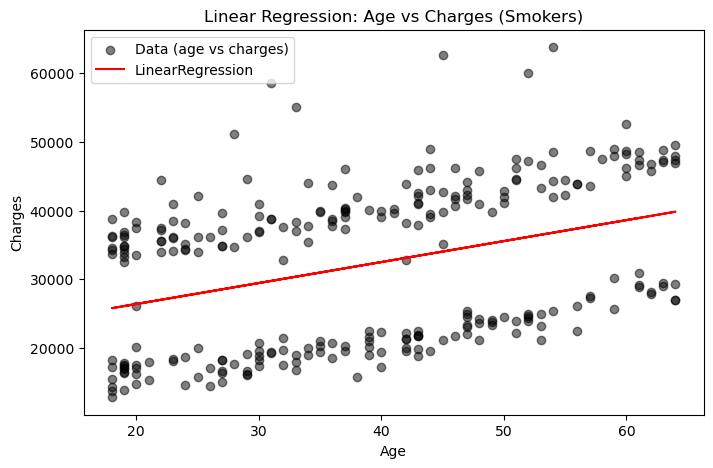

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

medical_df = pd.read_csv('medical-charges.csv')
smoker_df = medical_df[medical_df.smoker == 'yes']

X = smoker_df['age'].values.reshape(-1,1)  # 2D масив для sklearn
y = smoker_df['charges'].values

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
b = lin_reg.intercept_
w = lin_reg.coef_[0]

print("Коефіцієнт (w) =", w)
print("Перехоплення (b) =", b)
print("RMSE =", rmse)
print("R^2 (точність) =", r2)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='black', alpha=0.5, label='Data (age vs charges)')
plt.plot(X, y_pred, color='red', label='LinearRegression')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Linear Regression: Age vs Charges (Smokers)")
plt.legend()
plt.show()
